In [462]:
import pandas as pd
from functools import reduce

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

In [2]:
df = pd.read_json('files/data.json')

In [3]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,ticket_types,user_age,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,"[{'event_id': 527017, 'cost': 25.0, 'availabil...",36,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,"[{'event_id': 786878, 'cost': 35.0, 'availabil...",149,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,"[{'event_id': 787337, 'cost': 93.51, 'availabi...",214,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,"[{'event_id': 885645, 'cost': 25.0, 'availabil...",889,1283870102,3,,None,NaN,NaN,None,None
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,"[{'event_id': 1114349, 'cost': 150.0, 'availab...",35,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA


In [4]:
df['acct_type'].value_counts()

premium             12373
fraudster_event       851
fraudster             437
spammer_limited       218
spammer_warn          144
tos_warn               91
spammer_noinvite       84
tos_lock               77
locked                 54
fraudster_att           5
spammer_web             2
spammer                 1
Name: acct_type, dtype: int64

In [5]:
df['Fraud'] = ((df['acct_type'] == 'fraudster_event') | (df['acct_type'] == 'fraudster') | (df['acct_type'] == 'fraudster_att')).astype(int)

In [6]:
df[df['Fraud'] == 1]['user_age'].mean()

87.1523588553751

In [8]:
df[df['Fraud'] == 0]['user_age'].mean()

402.6830726770929

In [11]:
df[df['Fraud'] == 1]['currency'].value_counts()

USD    858
GBP    343
CAD     42
EUR     37
AUD     12
MXN      1
Name: currency, dtype: int64

In [12]:
df[df['Fraud'] == 0]['currency'].value_counts()

USD    8838
GBP    1879
CAD    1280
AUD     767
EUR     225
NZD      55
Name: currency, dtype: int64

In [16]:
for x in df.columns:
    print(x)

acct_type
approx_payout_date
body_length
channels
country
currency
delivery_method
description
email_domain
event_created
event_end
event_published
event_start
fb_published
gts
has_analytics
has_header
has_logo
listed
name
name_length
num_order
num_payouts
object_id
org_desc
org_facebook
org_name
org_twitter
payee_name
payout_type
previous_payouts
sale_duration
sale_duration2
show_map
ticket_types
user_age
user_created
user_type
venue_address
venue_country
venue_latitude
venue_longitude
venue_name
venue_state
Fraud


In [55]:
df['ticket_types'][0]

[{'availability': 1,
  'cost': 25.0,
  'event_id': 527017,
  'quantity_sold': 0,
  'quantity_total': 800},
 {'availability': 1,
  'cost': 50.0,
  'event_id': 527017,
  'quantity_sold': 0,
  'quantity_total': 100},
 {'availability': 1,
  'cost': 550.0,
  'event_id': 527017,
  'quantity_sold': 0,
  'quantity_total': 20}]

In [53]:
df['cost'] = df['ticket_types'].map(lambda x: reduce((lambda total, ticket: total + ticket['quantity_sold'] * ticket['cost']), x, 0))

In [54]:
df.head()

,acct_type,approx_payout_date,body_length,channels,country,currency,delivery_method,description,email_domain,event_created,...,user_created,user_type,venue_address,venue_country,venue_latitude,venue_longitude,venue_name,venue_state,Fraud,cost
0,fraudster_event,1266062400,3852,5,US,USD,0.0,"<p><a href=""http://s432.photobucket.com/albums...",gmail.com,1262739706,...,1259613950,1,717 Washington Avenue,US,25.777471,-80.133433,INK Nightclub - South Beach,FL,1,0.00
1,premium,1296720000,3499,0,US,USD,1.0,"<p>Join us for a quick, one-night, community-b...",ruf.org,1293832670,...,1280942776,3,,US,32.776566,-79.930922,"The Charleston, SC area",SC,0,875.00
2,premium,1296172800,2601,8,US,USD,1.0,"<h3><span class=""subcategory""><strong>Teacher ...",pvsd.k12.ca.us,1291090956,...,1272559388,3,10100 Pioneer Blvd Suite 100,US,33.944201,-118.080419,Los Angeles County Office of Education,CA,0,4488.48
3,premium,1388966400,12347,6,IE,EUR,1.0,"<p style=""margin-bottom: 1.3em; padding-bottom...",irishtabletennis.com,1360681570,...,1283870102,3,,None,NaN,NaN,None,None,0,795.00
4,premium,1297900800,2417,11,US,USD,0.0,<p>Writers and filmmakers need to understand t...,artsandbusinesscouncil.org,1291994666,...,1288984065,3,One Marina Park Drive,US,42.353848,-71.044276,Fish & Richardson,MA,0,2399.00


In [57]:
df[df['Fraud'] == 0]['cost'].mean()

2824.765238423801

In [58]:
df[df['Fraud'] == 1]['cost'].mean()

461.79307811291585

In [69]:
simple_df = df.copy()

In [70]:
columns = ['body_length', 'user_age', 'Fraud']

In [71]:
simple_df = simple_df[columns]

In [72]:
simple_df.head()

,body_length,user_age,Fraud
0,3852,36,1
1,3499,149,0
2,2601,214,0
3,12347,889,0
4,2417,35,0


In [457]:
def do_KF(X, y):
    kf = KFold(n_splits=2)
    kf.get_n_splits(X)
    KFold(n_splits=2, random_state=None, shuffle=False)
    recalls = []
    accuracies = []
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        loggo = LogisticRegression()
        loggo.fit(X_train, y_train)
        predictions = loggo.predict_proba(X_test)[:, 1].tolist()
        predictions = list(map((lambda x: 1 if x > .1 else 0), predictions))
        matches = 0
        accs = 0
        for i, prediction in enumerate(predictions):
            if prediction == 1 and y_test[i] == predictions[i]:
                matches += 1
            if y_test[i] == predictions[i]:
                accs += 1
        recalls.append(matches / len(y_test))
        accuracies.append(accs / len(y_test))
    return (sum(recalls) / len(recalls), sum(accuracies) / len(accuracies))

In [458]:
X = simple_df[['body_length', 'user_age']].values
y = simple_df[['Fraud']].values

In [459]:
# X.values

In [460]:
do_KF(X, y)

/Users/michaelbarton/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(0.07707302016805989, 0.6750365439833957)

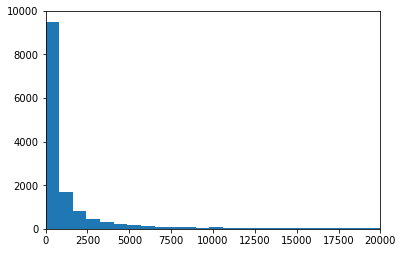

In [467]:
plt.hist(df['cost'], bins=1000)
plt.xlim(0, 20000)
plt.show()

In [472]:
# Check cost frequency
print(df['cost'].size)
print(df[df['cost'] < 500]['cost'].size)

14337
8214
